# Análisis de series temporales

## Introducción

### Propósito del proyecto

<!-- TODO: Explicar el propósito del proyecto -->
En este proyecto de ciencia de datos se desarrollarán técnicas de regresión mediante series temporales (_time series_) con el objetivo de intentar predecir el precio de acciones en bolsa de diferentes empresas farmacéuticas.

En concreto se desea predecir el precio de las acciones de la farmacéutica _Pfizer_ utilizando un conjunto de datos con registros de los últimos 5 años (2019-2024). Para ayudar a la predicción, se cuentan también con información de las siguientes compañías farmacéuticas:

* _Moderna_
* _AstraZeneca_
* _Johnson & Johnson_

Esta información adicional se utilizará para comprobar posibles relaciones entre las subidas o valores de las otras empresas frente al estado de las acciones de _Pfizer_.

Debido al comportamiento impredecible de la bolsa en corto plazo, se propone realizar una predicción a medio plazo, buscando predecir los precios de las acciones cada semana/dos semanas en vez de de manera diaria. Este punto será desarrollado más adelante.

Para este estudio se ha planteado utilizar tres tipos de modelos de series temporales:

* Series temporales univariadas.
* Series temporales multivariadas.
* Series temporales sobre datos de tipo panel.

Esta información ha sido extraída del sitio web [Yahoo Finance](https://finance.yahoo.com/).

### Librerías utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Descripción de los conjuntos de datos utilizados

<!-- TODO: Explicar conjuntos de datos utilizados -->
Los conjuntos de datos se encuentra almacenados en los siguientes ficheros _.csv_:

* `AZN.csv` (_AstraZeneca_)
* `JNJ.csv` (_Johnson & Johnson_)
* `MRNA.csv` (_Moderna_)
* `PFE.csv` (_Pfizer_)

Al tratarse de datos de valores en bolsa, la estructura de todos los conjuntos de datos es la misma en todos los ficheros:

|Campo|Definición|
|-|-|
|`Date`|Fecha de registro de precios|
|`Open`|Precio inicial al momento del registro|
|`High`|Precio más alto a lo largo del día|
|`Low` |Precio más bajo a lo largo del día|
|`Close`|Precio de cierre al final del día|
|`Adj Close`|Precio de cierre ajustado al final del día|
|`Volume`|Número de acciones vendidas|

In [2]:
pfizer_data = pd.read_csv('../data/input/stock/PFE.csv')

display(pfizer_data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,41.024670,41.024670,40.483871,40.863377,33.336327,15275727
1,2019-06-11,40.986717,41.081593,40.370018,40.483871,33.026730,18813162
2,2019-06-12,40.294117,40.958256,40.284630,40.872864,33.344067,16296843
3,2019-06-13,40.863377,40.929790,40.199242,40.322582,32.895149,14464042
4,2019-06-14,40.341557,40.673622,40.303604,40.569260,33.096386,13197872


In [3]:
azeneca_data = pd.read_csv('../data/input/stock/AZN.csv')

display(azeneca_data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,39.160000,39.720001,39.080002,39.590000,34.930904,2928900
1,2019-06-11,39.689999,39.740002,39.310001,39.389999,34.754440,2378100
2,2019-06-12,39.520000,39.990002,39.520000,39.930000,35.230892,2507300
3,2019-06-13,39.810001,40.009998,39.599998,39.910000,35.213245,2020000
4,2019-06-14,39.680000,39.959999,39.619999,39.669998,35.001492,1477800


In [4]:
jnj_data = pd.read_csv('../data/input/stock/JNJ.csv')

display(jnj_data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,138.600006,139.149994,137.600006,139.020004,121.157661,4994700
1,2019-06-11,139.679993,140.660004,139.500000,139.779999,121.819977,8230500
2,2019-06-12,140.300003,142.910004,140.300003,141.679993,123.475845,9216500
3,2019-06-13,141.720001,141.949997,140.210007,140.710007,122.630539,7500800
4,2019-06-14,141.229996,141.490005,140.039993,140.089996,122.090157,6548100


In [5]:
moderna_data = pd.read_csv('../data/input/stock/MRNA.csv')

display(moderna_data.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-10,17.850000,17.990000,15.670000,15.670000,15.670000,2574700
1,2019-06-11,16.090000,16.879999,15.750000,16.000000,16.000000,5614200
2,2019-06-12,16.110001,16.360001,15.620000,16.299999,16.299999,2042400
3,2019-06-13,16.420000,17.590000,16.049999,16.160000,16.160000,1607300
4,2019-06-14,16.250000,16.674999,15.320000,15.400000,15.400000,2080000


### Selección de variables independientes

Como variable de estudio se ha escogido el precio ajustado de cierre de ventas de acciones (`Adj Close`), por lo que solo se estudiarán esas variables independientes.

In [6]:
pfizer_data = pfizer_data.filter(items=['Date', 'Adj Close'])

display(pfizer_data.head())

,Date,Adj Close
0,2019-06-10,33.336327
1,2019-06-11,33.026730
2,2019-06-12,33.344067
3,2019-06-13,32.895149
4,2019-06-14,33.096386


In [7]:
azeneca_data = azeneca_data.filter(items=['Date', 'Adj Close'])

display(azeneca_data.head())

,Date,Adj Close
0,2019-06-10,34.930904
1,2019-06-11,34.754440
2,2019-06-12,35.230892
3,2019-06-13,35.213245
4,2019-06-14,35.001492


In [8]:
jnj_data = jnj_data.filter(items=['Date', 'Adj Close'])

display(jnj_data.head())

,Date,Adj Close
0,2019-06-10,121.157661
1,2019-06-11,121.819977
2,2019-06-12,123.475845
3,2019-06-13,122.630539
4,2019-06-14,122.090157


In [9]:
moderna_data = moderna_data.filter(items=['Date', 'Adj Close'])

display(moderna_data.head())

,Date,Adj Close
0,2019-06-10,15.670000
1,2019-06-11,16.000000
2,2019-06-12,16.299999
3,2019-06-13,16.160000
4,2019-06-14,15.400000


### Ajustes de granularidad

<!-- TODO: Explicar que se reducira de dias a semanas o grupos de 2 semanas -->
Anteriormente se explicó que el comportamiento de las acciones en bolsa tiende a ser caótico a corto plazo pero relativamente estable a largo plazo.

Como el proyecto busca identificar patrones en el precio de las acciones de _Pfizer_, se ha decidido reducir la granularidad temporal de los conjuntos de datos, para trabajar con información en semanas en vez de en días. Concretamente, se ha decidido condensar el conjunto de datos en intervalos de 1 semana, siendo el valor de $y$ de cada semana la media de cada uno de sus días.

In [10]:
def fill_df_date_range(df: pd.DataFrame) -> pd.DataFrame:
    """Genera un conjunto de datos con un índice temporal y genera entradas para
        los días no registrados originalmente. Sustituye los valores nulos por
        la media de sus valores próximos

    Args:
        df (`pd.DataFrame`): Conjunto de datos con registros temporales a ser arreglado

    Returns:
        `pd.DataFrame`: Conjunto de datos con días faltantes insertados y valores
        faltantes rellenados
    """
    df = df.copy()
    
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    date_range = pd.date_range(
        start = df.index.min(), 
        end = df.index.max()
    )
    df = df.reindex(date_range)

    df = df.interpolate(method='linear')

    return df

In [11]:
def reduce_df_to_weekly(df: pd.DataFrame) -> pd.DataFrame:
    """Reduce la granularidad de tiempo del conjunto de datos de días a semanas.
        Los nuevos valores de cada semana se calculan como la media de los valores
        originales

    Args:
        df (`pd.DataFrame`): Dataframe a modificar

    Returns:
        `pd.DataFrame`: Dataframe con el índice reducido a
    """
    return df.resample('W').mean()

In [12]:
pfizer_data     = fill_df_date_range(pfizer_data)
moderna_data    = fill_df_date_range(moderna_data)
jnj_data        = fill_df_date_range(jnj_data)
azeneca_data    = fill_df_date_range(azeneca_data)

A continuación se mostrará la diferencia gráfica entre los conjuntos de datos previos a la transformación frente a los conjuntos de datos tras reducir la granularidad a "semanal".

In [13]:
from sktime.utils import plot_series
import matplotlib.dates as mdates

def plot_granularity_diff(df: pd.DataFrame, company: str) -> None:
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

    fig.subplots_adjust(hspace=1)

    daily_df = df.copy(deep=True)

    df = reduce_df_to_weekly(df)

    ax1.plot(daily_df.index, daily_df)
    ax1.set_title(f'Datos Diarios de {company}')

    ax2.plot(df.index, df)
    ax2.set_title(f'Datos Semanales de {company}')

    date_format = mdates.DateFormatter('%Y-%m-%d')
    ax1.xaxis.set_major_formatter(date_format)
    ax2.xaxis.set_major_formatter(date_format)

    # Correcciones de fechas máximas y mínimas
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax2.xaxis.set_major_locator(mdates.AutoDateLocator())

    for ax in (ax1, ax2):
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    plt.show()

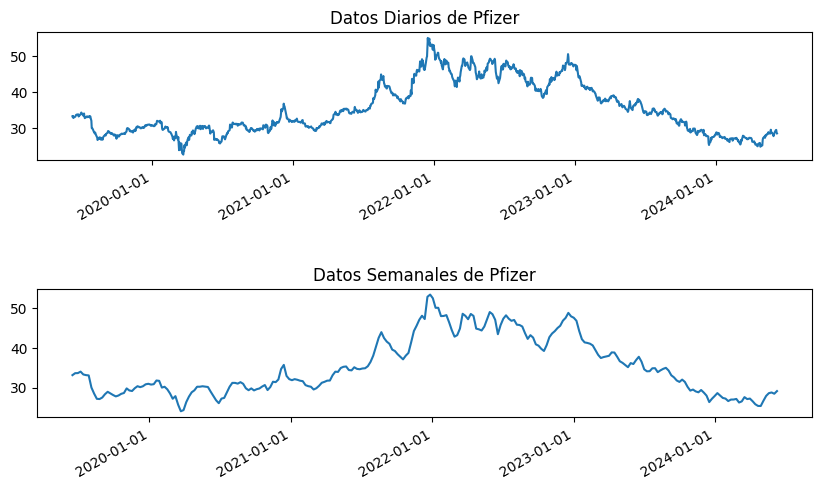

In [14]:
plot_granularity_diff(pfizer_data, 'Pfizer')

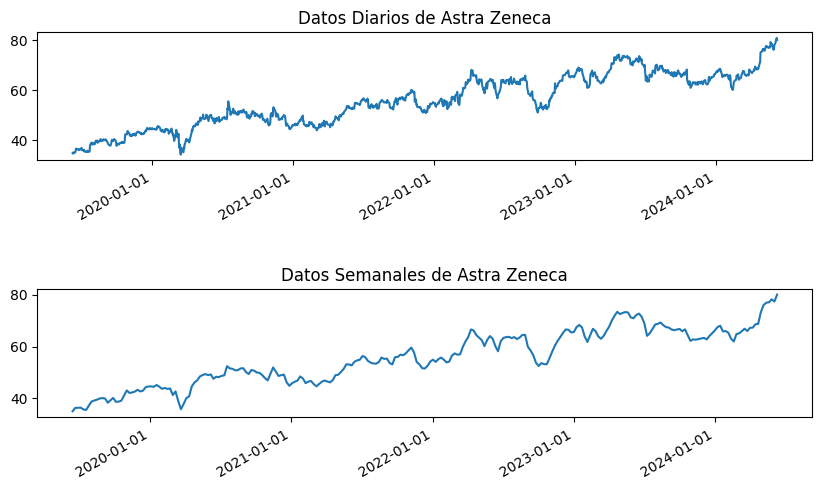

In [15]:
plot_granularity_diff(azeneca_data, 'Astra Zeneca')

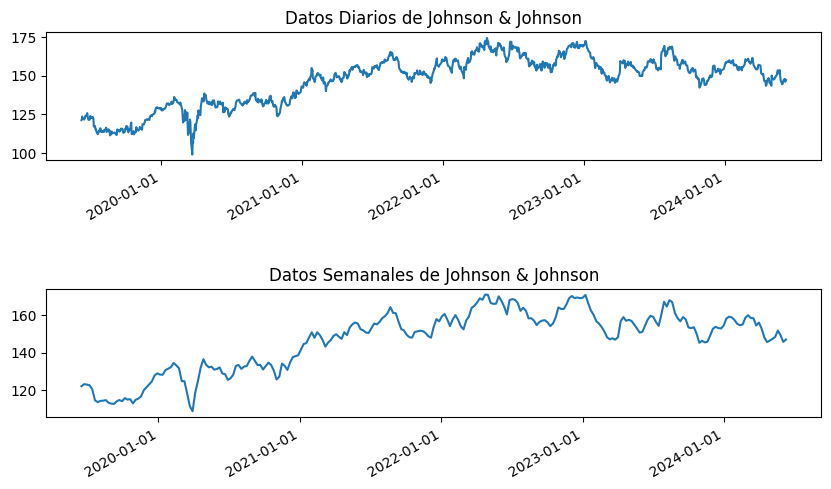

In [16]:
plot_granularity_diff(jnj_data, 'Johnson & Johnson')

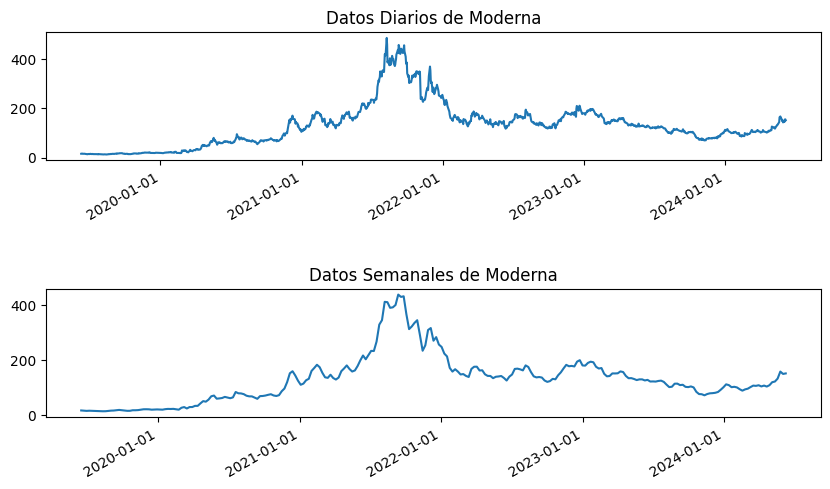

In [17]:
plot_granularity_diff(moderna_data, 'Moderna')

Se observa una disminución de la variabilidad y el número de datos en los gráficos, pues el objetivo es el de predecir en periodos medios de semanas y meses.

Además, esta reducción de variabilidad puede mejorar el rendimiento de los modelos de regresión al reducir posible ruido en las muestras.

In [18]:
pfizer_data = reduce_df_to_weekly(pfizer_data)

display(pfizer_data.head())

,Adj Close
2019-06-16,33.140615
2019-06-23,33.630446
2019-06-30,33.652563
2019-07-07,34.021876
2019-07-14,33.310895


In [19]:
moderna_data = reduce_df_to_weekly(moderna_data)

display(moderna_data.head())

,Adj Close
2019-06-16,15.814286
2019-06-23,15.090000
2019-06-30,14.265714
2019-07-07,14.826429
2019-07-14,14.397143


In [20]:
jnj_data = reduce_df_to_weekly(jnj_data)

display(jnj_data.head())

,Adj Close
2019-06-16,122.112578
2019-06-23,123.203210
2019-06-30,122.977871
2019-07-07,122.633613
2019-07-14,120.394454


In [21]:
azeneca_data = reduce_df_to_weekly(azeneca_data)

display(azeneca_data.head())

,Adj Close
2019-06-16,35.058210
2019-06-23,36.355213
2019-06-30,36.391767
2019-07-07,36.450376
2019-07-14,35.770363


### Operaciones de transformación de datos

<!-- TODO: Explicar dataframe de datos únicos (con múltiples columnas) -->
Para poder entrenar modelos de series temporales tanto univariados como multivariados, es necesario unificar los diferentes conjuntos de datos en un único conjunto total.

El conjunto de datos resultante contendrá los siguientes campos:

|Campo|Definición|
|-|-|
|`pfizer_adj_close`|Fecha de registro de precios|
|`moderna_adj_close`|Precio inicial al momento del registro|
|`azeneca_adj_close`|Precio más alto a lo largo del día|
|`jnj_adj_close` |Precio más bajo a lo largo del día|

In [22]:
combined_data = pd.concat(
    [pfizer_data, moderna_data, azeneca_data, jnj_data], 
    axis=1, 
    keys=['pfizer_adj_close', 'moderna_adj_close', 'azeneca_adj_close', 'jnj_adj_close']
)
combined_data.columns = combined_data.columns.droplevel(1)

display(combined_data.head())

,pfizer_adj_close,moderna_adj_close,azeneca_adj_close,jnj_adj_close
2019-06-16,33.140615,15.814286,35.058210,122.112578
2019-06-23,33.630446,15.090000,36.355213,123.203210
2019-06-30,33.652563,14.265714,36.391767,122.977871
2019-07-07,34.021876,14.826429,36.450376,122.633613
2019-07-14,33.310895,14.397143,35.770363,120.394454


Para el caso de los modelos de flujos de datos (_Data Streams_) se utilizará el conjunto de datos univariado/multivariado por sencillez.

## Análisis exploratorio de datos

### Tendencia y estacionalidad

<!-- TODO: Describir tendencia si la hubiera -->

La estacionalidad se refiere a patrones o fluctuaciones recurrentes que se observan regularmente en datos, generalmente asociados con cambios previsibles en períodos de tiempo específicos, como estaciones, trimestres o días de la semana.

Decimos que un conjunto de datos temporal demuestra estacionalidad cuando estos patrones se identifican mediante técnicas de descomposición estacional (_seasonal decompose_).

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

En este apartado, se analizará la tendencia y comportamiento estacional de los diferentes datos disponibles, con el objetivo de comenzar a establecer qué modelos podrían ser adecuados para realizar predicciones.

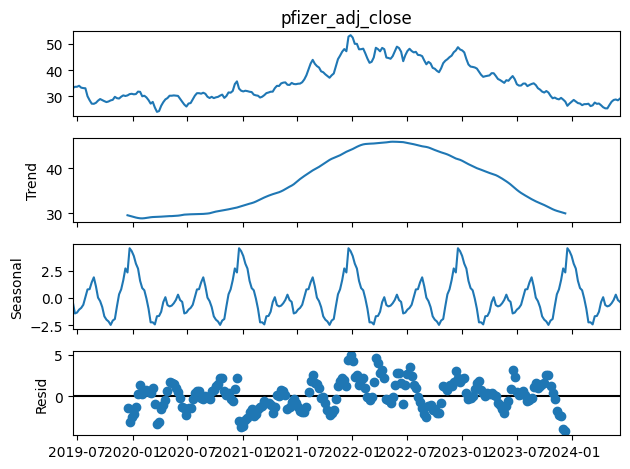

In [24]:
seasonal_decompose(combined_data['pfizer_adj_close'], model = 'aditive').plot()

plt.show()

En esta descomposición estacional se observa una tendencia creciente durante la mayor parte del conjunto de datos, para luego descender durante el resto del conjunto de datos.

La estacionalidad es marcada pero no extremadamente significante. Su rango va desde $-2.5$ a $2.5$, por lo que la varación estacional de las acciones respecto al total no es tan elevada. Además de eso, existen gran cantidad de residuos, por lo que existen muchos puntos que no se adaptan a las estaciones generadas.

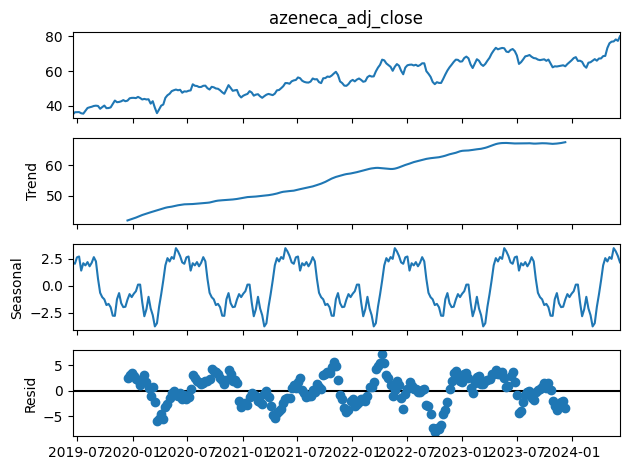

In [25]:
seasonal_decompose(combined_data['azeneca_adj_close'], model = 'aditive').plot()

plt.show()

Observamos esta vez una tendencia creciente muy marcada, sin decrementos aparentes. En este caso la estacionalidad se comporta similar a la del apartado anterior: marcada pero no extremadamente significante. Además, existen gran cantidad de fechas que se salen de esta estacionalidad.

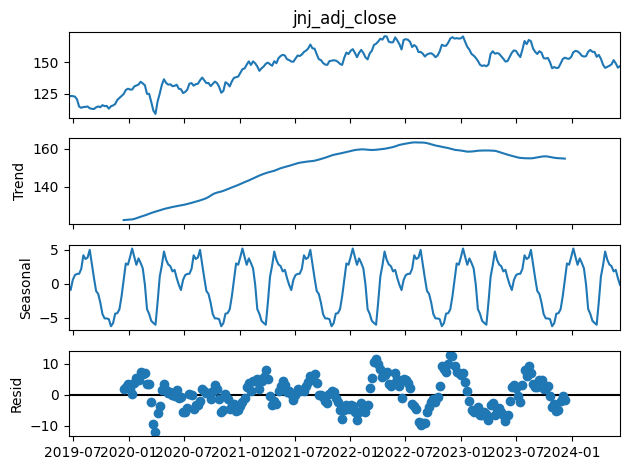

In [26]:
seasonal_decompose(combined_data['jnj_adj_close'], model = 'aditive').plot()

plt.show()

En este caso, se observa una tendencia creciente con un ligero decremento a partir de la mitad del rango de tiempo.

Se observa una estacionalidad mucho más marcada, quizás relacionada con que los valores de las acciones de _Johnson & Johnson_ son más elevados, por lo que el rango de valores estacionales es previsible que sea también mayor.

El rango de desechos parece amoldarse mejor a los valores que realmente debería tomar según la estacionalidad, por lo que se podría determinar que estas variables tienen una estacionalidad menos fluctuante.

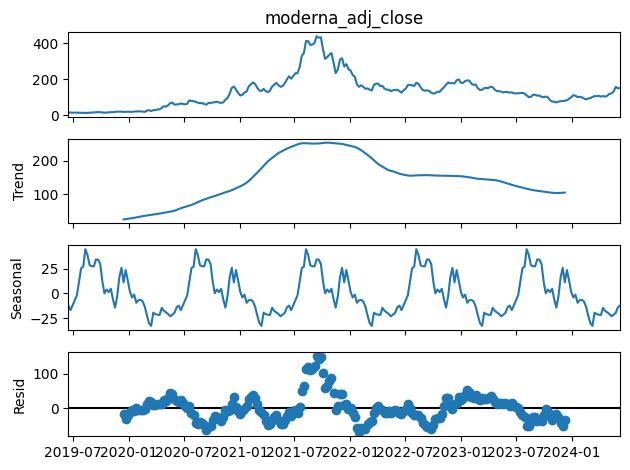

In [27]:
seasonal_decompose(combined_data['moderna_adj_close'], model = 'aditive').plot()

plt.show()

<!-- TODO: Describir estacionalidad si la hubiera -->

Por último, en los datos de Moderna se observa una tendencia mixta: Creciente hasta la mitad aproximada del tiempo, y levemente decreciente a continuación.

La estacionalidad vuelve a ser muy marcada, pero observando la cantidad de residuos y sus magnitudes, parece que resulta muy correcta.

### Estacionariedad

La estacionariedad es una característica crucial de las series temporales. Se dice que una serie es estacionaria cuando sus valores no dependen del tiempo, lo que significa que sus propiedades estadísticas, como la media, la varianza y la autocorrelación, permanecen constantes con el tiempo.

En otras palabras, una serie estacionaria es aquella cuyos valores y comportamientos son consistentes a lo largo del tiempo, sin verse influenciados por patrones estacionales.

Existen ciertos modelos de regresión que tienden a funcionar correctamente con series estacionarias, como es el caso de:

* ARIMA
* Modelo de suavizado exponencial

Para comprobar si una serie temporal es estacionaria, se puede realizar un test llamado "test de _Dickey-Fuller_ aumentado".

In [28]:
from statsmodels.tsa.stattools import adfuller

Este test parte de las siguientes hipótesis:

* $H_0$: La serie temporal analizada no es estacionaria.
* $H_1$: La serie temporal analizada es estacionaria.

En este test se define un **umbral de confianza** ($\alpha$) que sirve para comprobar las hipótesis propuestas. Si el resultado del test (p-valor) es mayor que el **umbral de confianza**, no tenemos la certeza para rechazar la hipótesis nula, por lo que no podemos determinar que la serie sea estacionaria.

In [29]:
def check_stationarity(df: pd.DataFrame) -> pd.DataFrame:
    ALPHA_THRESHOLD = 0.05
    
    results = []
    for column in df.columns:
        p_value = adfuller(df[column])[1]
        results.append((
            column,
            p_value,
            'Estacionaria' if p_value < ALPHA_THRESHOLD else 'No estacionaria'
        ))
    
    return pd.DataFrame.from_records(
        data = results,
        columns = ['Columna', 'P_value', 'Estacionariedad']
    )

In [30]:
check_stationarity(combined_data)

,Columna,P_value,Estacionariedad
0,pfizer_adj_close,0.430319,No estacionaria
1,moderna_adj_close,0.229543,No estacionaria
2,azeneca_adj_close,0.782531,No estacionaria
3,jnj_adj_close,0.286660,No estacionaria


Para obtener series temporales estacionarias a partir de series no estacionarias se suele aplicar un mecanismo denominado diferenciación, donde se calculan las diferencias entre valores consecutivos de la serie original. Este proceso reduce o elimina tendencias y variaciones cíclicas, estabilizando así la media de la serie.

In [31]:
check_stationarity(combined_data.diff().dropna())

,Columna,P_value,Estacionariedad
0,pfizer_adj_close,2.015504e-09,Estacionaria
1,moderna_adj_close,1.141744e-04,Estacionaria
2,azeneca_adj_close,2.280656e-20,Estacionaria
3,jnj_adj_close,1.127022e-19,Estacionaria


Se observa que ninguna de nuestras series temporales es estacionaria de base, por lo que en caso de querer aplicar modelos que requieran de datos estacionarios, se debería aplicar al menos una diferenciación a todas las series temporales.

### Autocorrelación (_ACF_) y autocorrelación parcial (_PACF_)

<!-- TODO: Explicar por encima correlación y autocorrelación -->
El análisis de autocorrelación (ACF) y de autocorrelación parcial (PACF) examina la relación entre los datos y sus valores pasados. La ACF mide cómo están correlacionados los valores actuales con los retrasos anteriores, identificando patrones y ciclos en la serie de tiempo. La PACF, en cambio, mide estas correlaciones eliminando efectos intermedios, ayudando a determinar cuántos valores pasados influyen directamente en los valores actuales.

Este análisis es esencial para desarrollar modelos autoregresivos, como **AR** y **ARIMA**, ya que indica cuántos retrasos incluir en el modelo para una predicción precisa.

In [32]:
from sktime.utils.plotting import plot_correlations

def homemade_plot_correlations(time_series: pd.Series) -> None:
    fig, (ax1, ax2, ax3) = plot_correlations(time_series, series_title=time_series.name)

    # Configurar formato de fechas en el eje x
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Ajustar la localización de las fechas automáticamente
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())

    # Rotar etiquetas del eje x para mejor visualización
    for label in ax1.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

#### Análisis de series temporales base

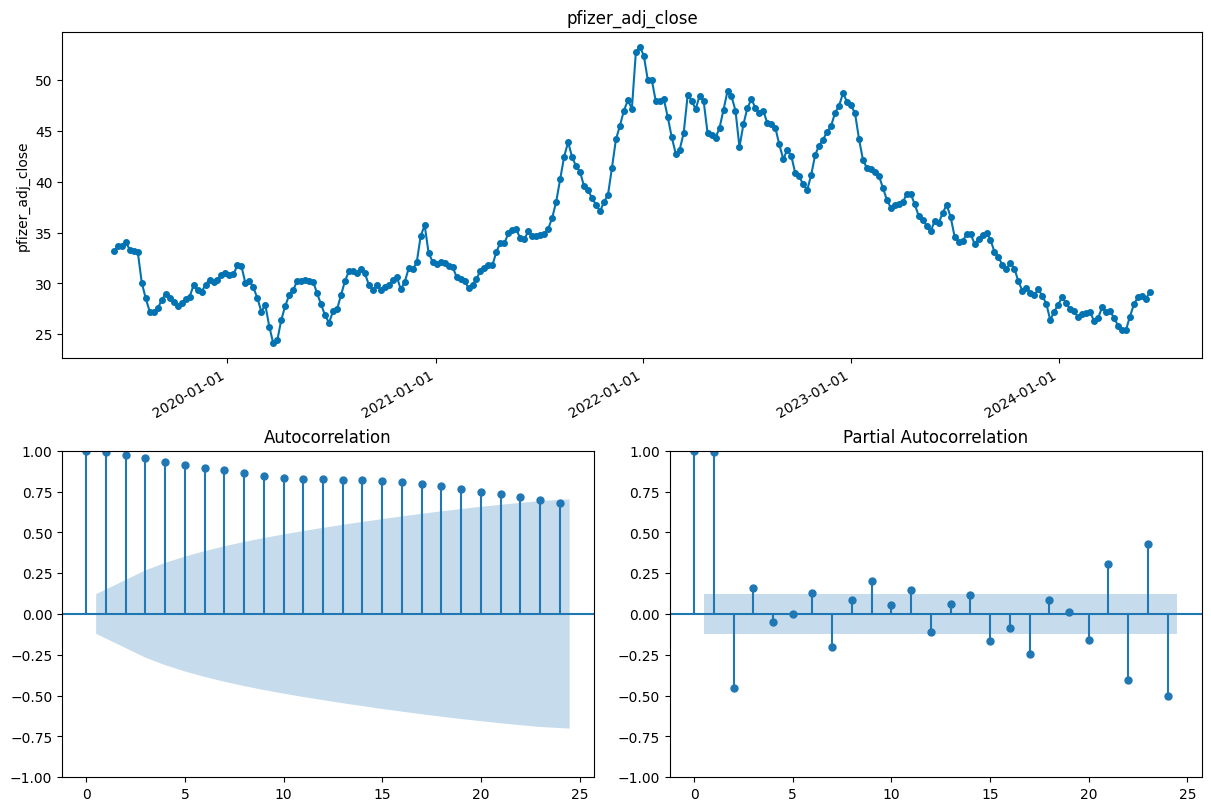

In [33]:
homemade_plot_correlations(combined_data['pfizer_adj_close'])

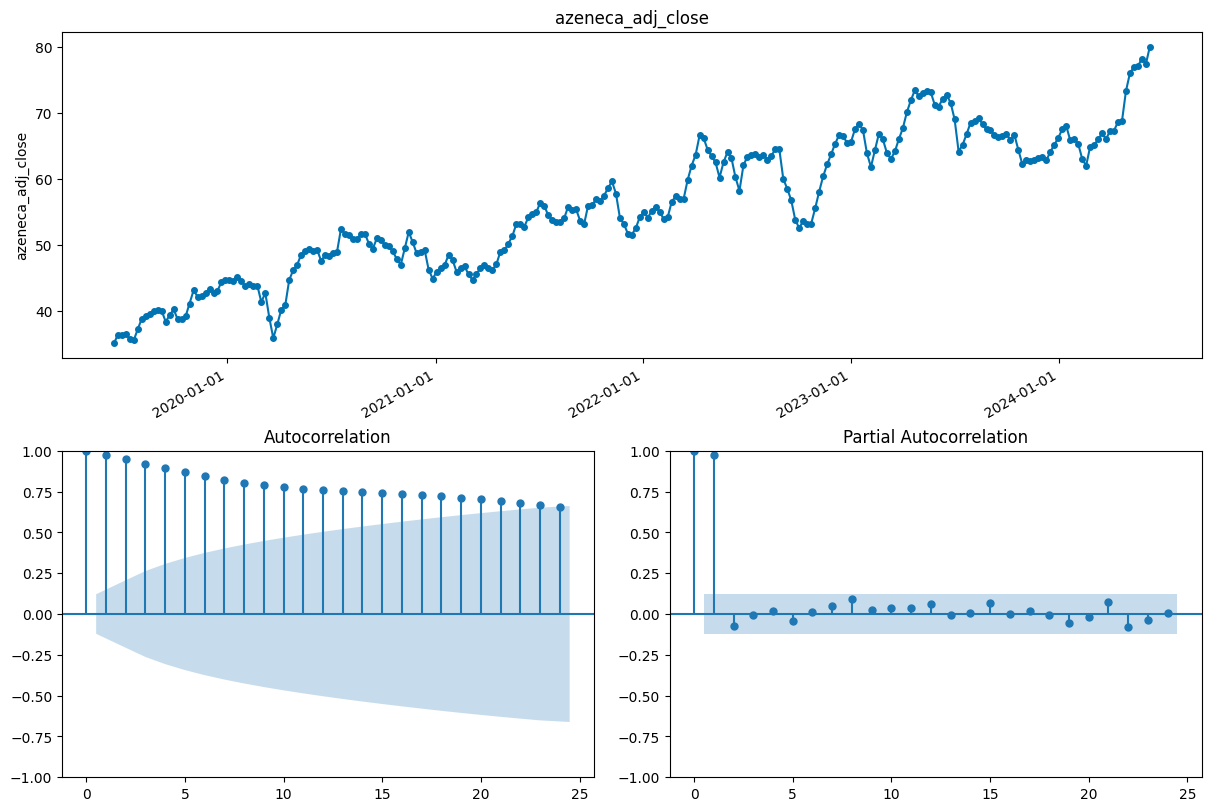

In [34]:
homemade_plot_correlations(combined_data['azeneca_adj_close'])

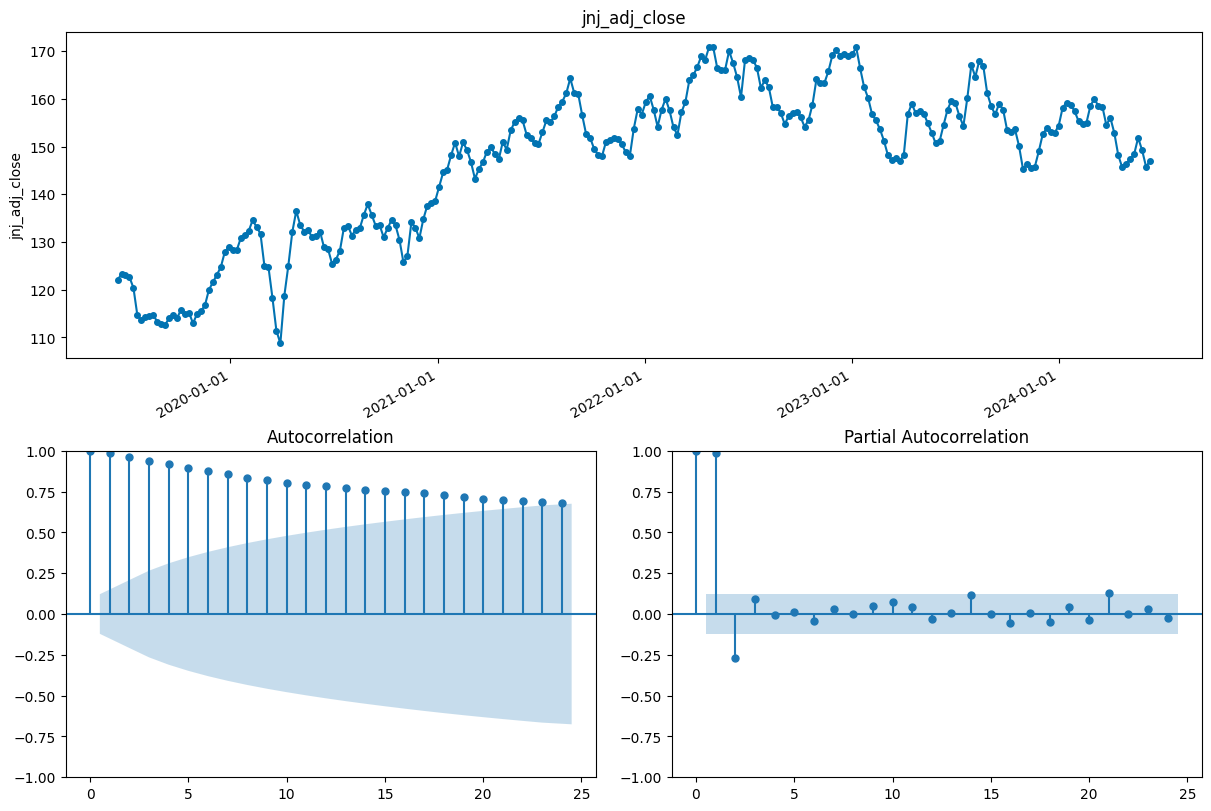

In [35]:
homemade_plot_correlations(combined_data['jnj_adj_close'])

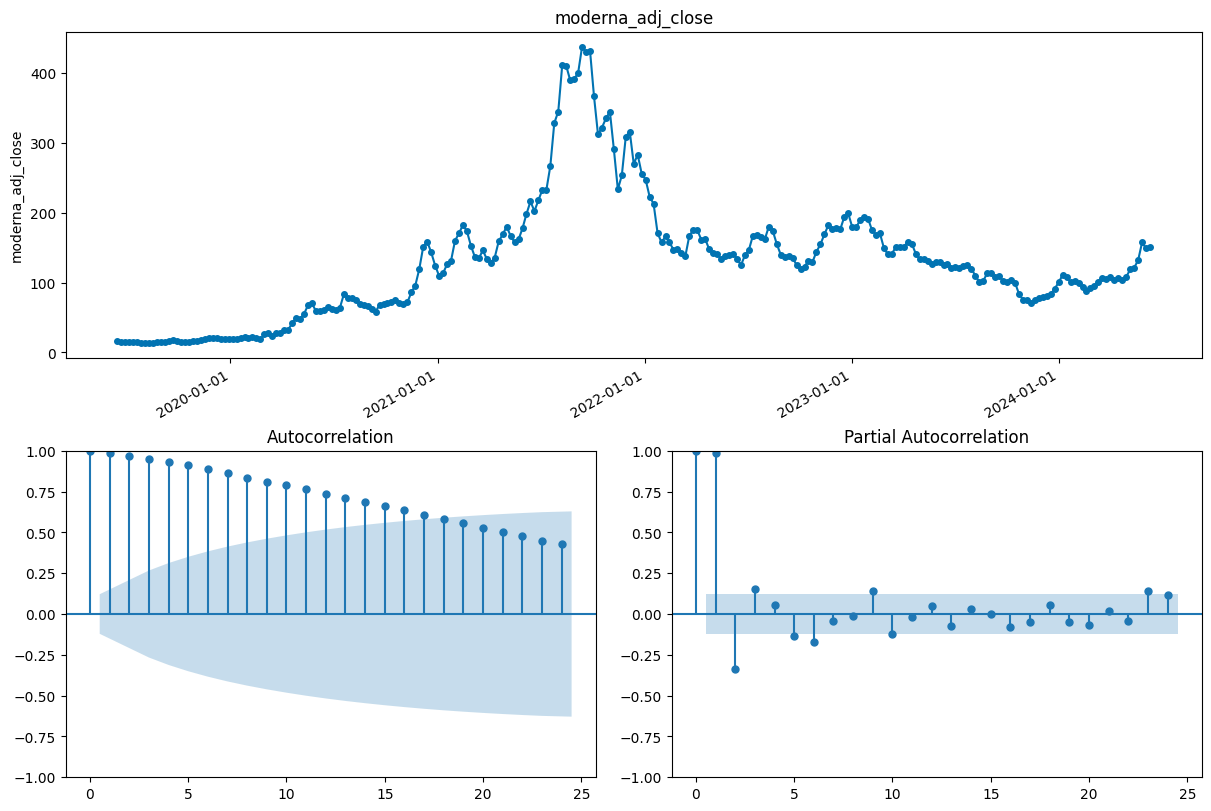

In [36]:
homemade_plot_correlations(combined_data['moderna_adj_close'])

#### Análisis de series temporales diferenciadas

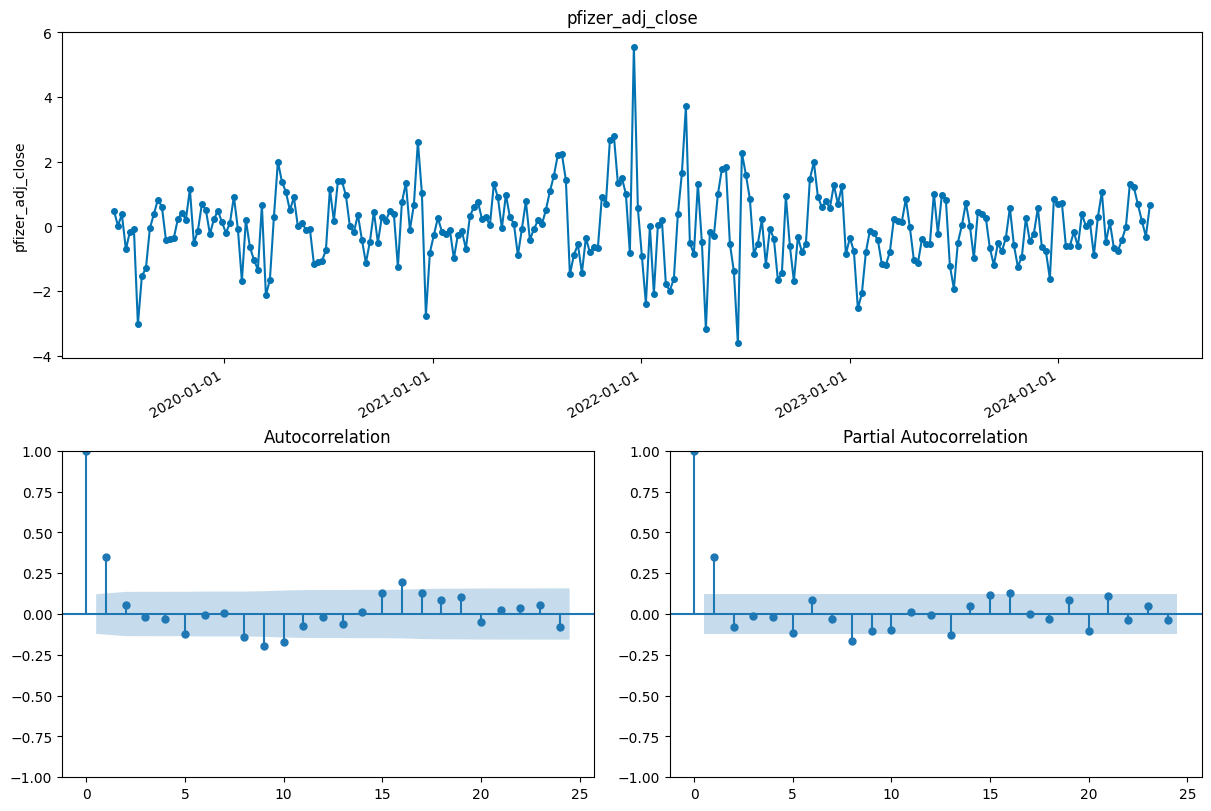

In [37]:
homemade_plot_correlations(combined_data['pfizer_adj_close'].diff().dropna())

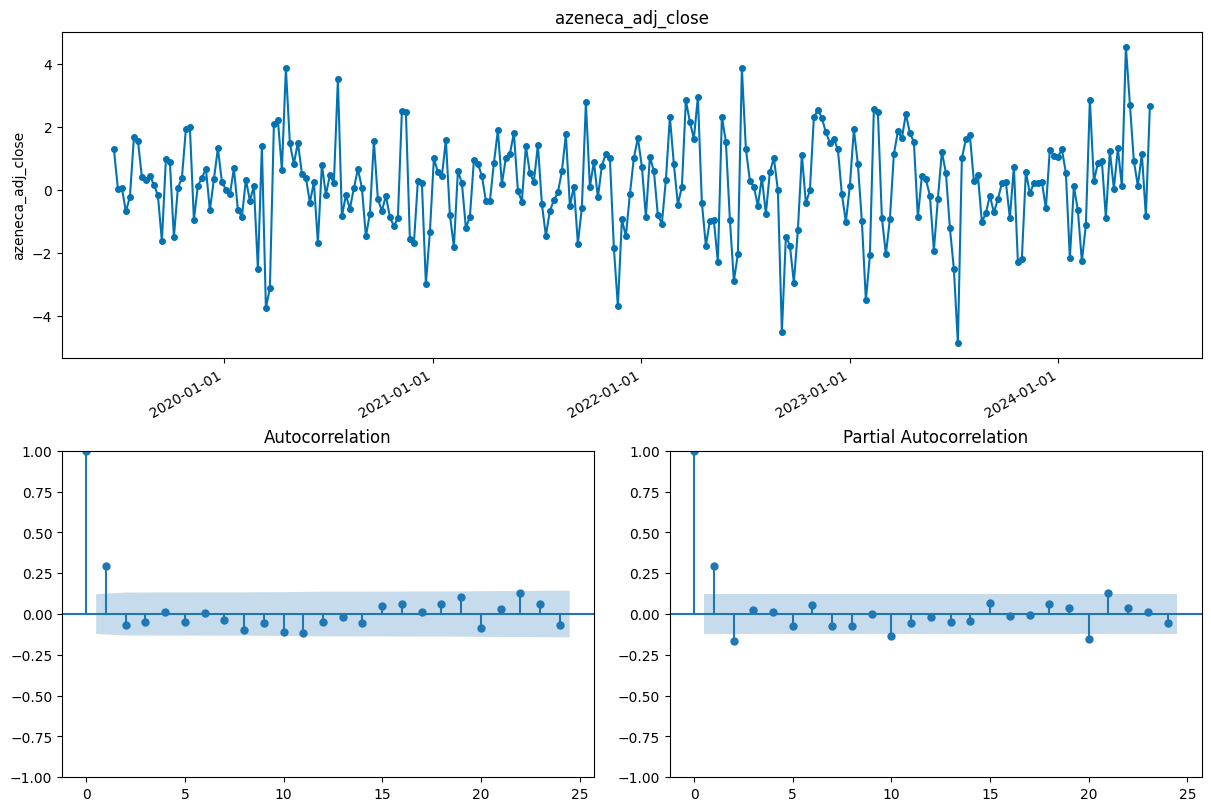

In [38]:
homemade_plot_correlations(combined_data['azeneca_adj_close'].diff().dropna())

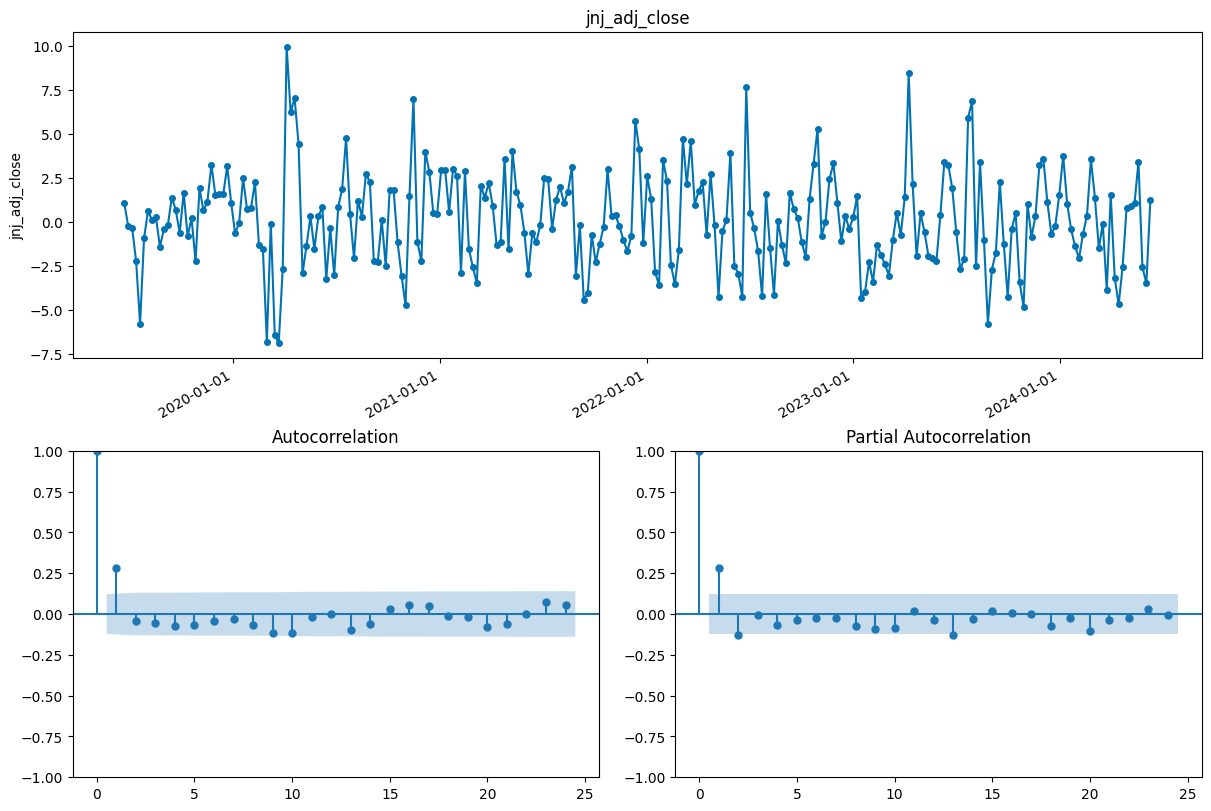

In [39]:
homemade_plot_correlations(combined_data['jnj_adj_close'].diff().dropna())

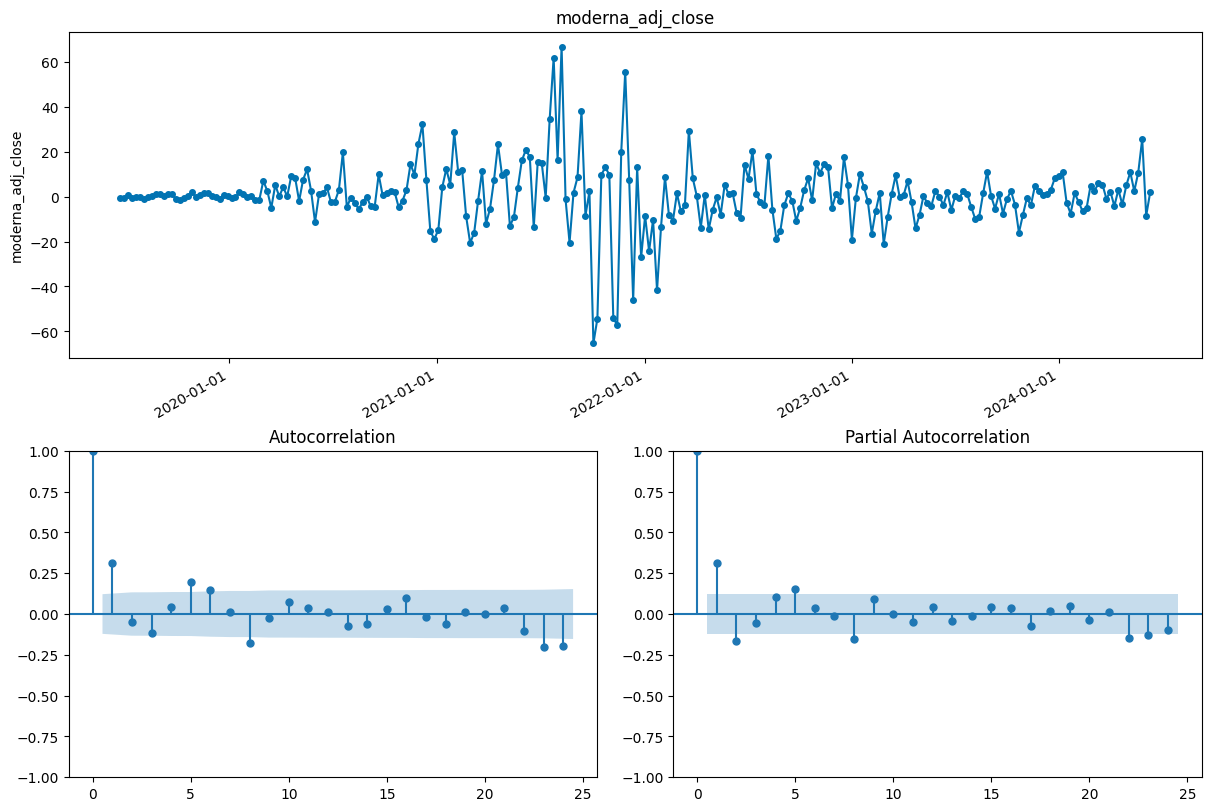

In [40]:
homemade_plot_correlations(combined_data['moderna_adj_close'].diff().dropna())

## Uso de series temporales

Para la implementación de modelos de series temporales, se dividirá el conjunto de datos en 2 subconjuntos:

* Subconjunto de entrenamiento (_train_): Primer 80% de los datos de la serie temporal.
* Subconjunto de prueba (_test_): 20% restante de los datos de la serie temporal.

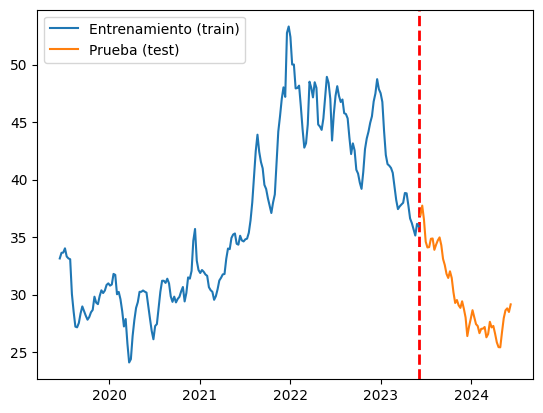

In [41]:
from sktime.split import temporal_train_test_split

y_train, y_test  = temporal_train_test_split(combined_data['pfizer_adj_close'], train_size=0.8)

date_bound = y_train.tail(n=1).index

plt.axvline(x=date_bound, color='red', linestyle='--', linewidth=2)

plt.plot(y_train, label='Entrenamiento (train)')
plt.plot(y_test, label = 'Prueba (test)')

# plt.ylim(bottom=0)

plt.legend()

plt.show()

Como métrica de rendimiento para este tipo de análisis, se utilizará el **Error porcentual absoluto medio _(MAPE)_**.

In [42]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [43]:
def plot_prediction_results(y_train, y_test, y_pred, title='Graph title'):

    date_bound = y_train.tail(n=1).index

    plt.axvline(x=date_bound, color='red', linestyle='--', linewidth=2)

    plt.title(title)

    plt.plot(y_train, label='Entrenamiento (train)')
    plt.plot(y_test, label = 'Expected')
    plt.plot(y_pred, label = 'Got')

    # plt.ylim(bottom=0)

    plt.legend()

    plt.show()

### Series univariadas

Para esta primera aproximación se entrenarán y predecirán modelos sobre el conjunto de datos de _Pfizer_, pues es la clave de las series temporales univariadas. Las acciones de Pfizer demustran las siguientes características:

* Demuestran una estacionalidad moderada.
* No es estacionaria.
    * Cuenta con una tendencia tanto creciente como decreciente.
    * Requiere de al menos una diferenciación para considerarse estacionaria.

Para este análisis se propone implementar los siguientes algoritmos de predicción:

* Suavizado Exponencial
* ARIMA
* SARIMA
* Prophet

Las motivaciones y características de cada implementación se explicarán en sus correspondientes apartados.

In [44]:
y_train, y_test  = temporal_train_test_split(combined_data['pfizer_adj_close'], train_size=0.8)

#### Modelo de Suavizado Exponencial

El suavizado exponencial (_Exponential Smoothing_) en series temporales es una técnica que se utiliza para suavizar variaciones aleatorias en los datos y hacer predicciones basadas en tendencias pasadas. Funciona calculando una media ponderada de observaciones pasadas, donde las ponderaciones disminuyen exponencialmente a medida que los datos se retroceden en el tiempo.

In [45]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

Esta técnica no se recomienda para tratar series estacionales, pues no es capaz de detectar las variaciones repetitivas en el tiempo. Tampoco se recomienda para series no estacionarias, pues las tendencias en los datos pueden evitar las predicciones precisas en el modelo.

Por estos motivos, se puede determinar _a priori_ que este modelo no será eficiente para analizar la serie temporal de _Pfizer_, pero se utilizará de todas formas para observar su rendimiento.

In [46]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive')
forecaster.fit(y_train)

y_pred = forecaster.predict(fh=np.arange(len(y_test)))

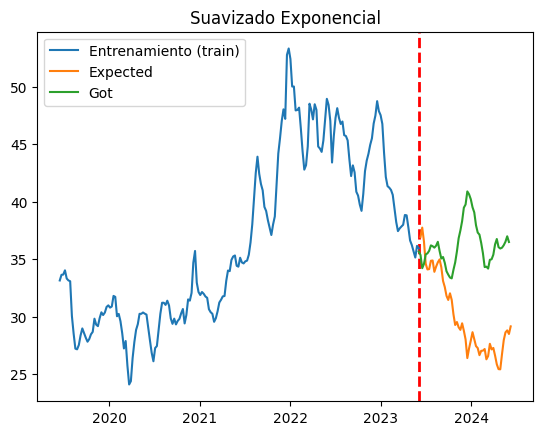

In [47]:
plot_prediction_results(y_train, y_test, y_pred, 'Suavizado Exponencial')

In [48]:
pd.DataFrame.from_records(
    [('Suavizado Exponencial', mean_absolute_percentage_error(y_test, y_pred))],
    columns=['Algoritmo', 'Error promedio porcentual absoluto']
)

,Algoritmo,Error promedio porcentual absoluto
0,Suavizado Exponencial,0.229515


#### Modelo ARIMA

El modelo ARIMA (_Autoregressive Integrated Moving Average_) es un método de análisis de series temporales que se utiliza para predecir valores futuros basándose en datos históricos.

Los componentes principales del modelo son el autoregresivo (AR), que utiliza la relación entre una observación y sus valores pasados (_lags_), y la media móvil (MA), que utiliza la relación entre una observación y los errores de predicción de las observaciones pasadas.

Los componentes principales de ARIMA se definen por tres parámetros: p, d y q.

1. **p (_Autoregressive order_)**:
    * Representa el número de observaciones pasadas (_lags_) que se utilizan en el modelo.
    * **Ejemplo**: $p=1$ usa el valor de la observación anterior.
2. **d (_Differencing order_)**:
    * Indica el número de veces que los datos deben ser diferenciados para hacer la serie temporal estacionaria.
    * **Ejemplo**: Si $d=1$, se utiliza la primera diferencia de la serie.
3. **q (_Moving Average order_)**:
    * Representa el número de términos de error pasados que se utilizan en el modelo.
    * **Ejemplo**: $q=1$ usa el error de la observación anterior.

In [49]:
from sktime.forecasting.arima import ARIMA

El conjunto de datos del que se dispone es viable para ser usado con el ARIMA, pues se puede estacionariezar aplicando diferenciaciones y demuestra una cierta autocorrelación, como se observó en la gráfica de autocorrelación del apartado de "Análisis exploratorio".

Para poder aplicar el modelo ARIMA sobre el conjunto de datos de _Pfizer_, primero se deben analizar los valores de _p_, d y _q_ que corresponden. Estos se calculan de la siguiente manera:

|Campo|Definición|Valor para _Pfizer_|
|-|-|-|
|_p_|Primer valor de $X$ en el que la función de Autocorrelación (ACF) se encuentra dentro del intervalo de confianza.|2|
|_d_|Número de diferenciaciones necesarias para que el conjunto de datos de _Pfizer_ sea estacionario.|1|
|_q_|Primer valor de $X$ en el que la función de Autocorrelación Parcial (PACF) se encuentra dentro del intervalo de confianza.|2|

In [50]:
import warnings
warnings.filterwarnings('ignore')

P_ORDER = 2
D_ORDER = 1
Q_ORDER = 2

forecaster = ARIMA(order=(P_ORDER, D_ORDER, Q_ORDER))
forecaster.fit(y_train)

y_pred = forecaster.predict(fh=np.arange(len(y_test)))

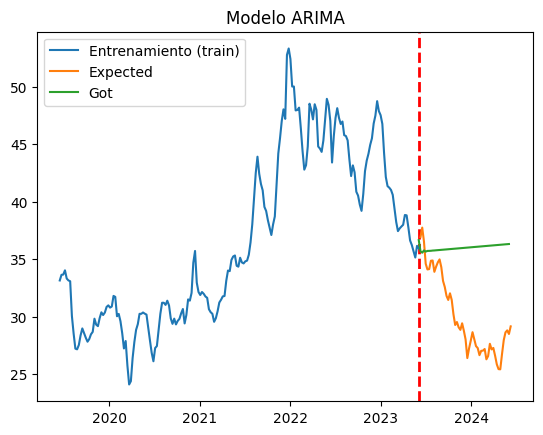

In [51]:
plot_prediction_results(y_train, y_test, y_pred, 'Modelo ARIMA')

In [52]:
pd.DataFrame.from_records(
    [('ARIMA', mean_absolute_percentage_error(y_test, y_pred))],
    columns=['Algoritmo', 'Error promedio porcentual absoluto']
)

,Algoritmo,Error promedio porcentual absoluto
0,ARIMA,0.218093


#### Modelo SARIMA

El modelo SARIMA es una extensión del modelo ARIMA, por lo que cuenta con los mismos elementos base: AR, I y MA. La principal diferencia frente al ARIMA clásico es que el SARIMA es capaz de utilizar la estacionalidad de un conjunto de datos a su favor, para realizar predicciones más certeras teniendo en cuenta posibles repeticiones estacionales en los datos.

Para poder utilizar un modelo SARIMA sobre un conjunto de datos, se deben calcular nuevos parámetros _P_, _D_ y _Q_, similares a los _p_, _d_ y _q_ originales pero enfocados a describir la estacionalidad de los datos. Estos se calculan de la siguiente manera:

|Parámetro|Método de cálculo|
|-|-|
|D|Número de variaciones estacionales necesarias para volver la serie no estacional.|
|P|Primer valor de $X$ de la serie diferenciada estacionalmente en el que la función de Autocorrelación (ACF) se encuentra dentro del intervalo de confianza.|
|Q|Primer valor de $X$ de la serie diferenciada estacionalmente en el que la función de Autocorrelación Parcial (PACF) se encuentra dentro del intervalo de confianza.|

El conjunto de datos de Pfizer es estacional, por lo que interesa aplicar este modelo para ver si mejora el rendimiento del ARIMA clásico. Para ello comenzaremos por aplicar una diferenciación estacional a los datos para observar si mantiene la estacionalidad o no.

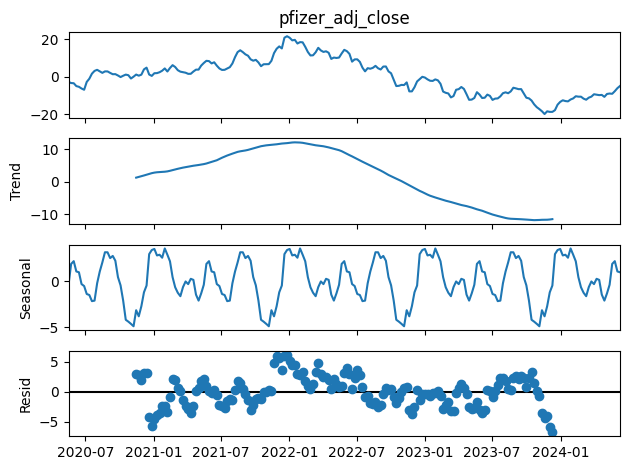

In [53]:
STATIONAL_D = 2

seasonal_decompose(combined_data['pfizer_adj_close'].diff(24 * STATIONAL_D).dropna(), model = 'aditive').plot()

plt.show()

Se observa que con 2 diferenciaciones estacionales la gráfica del conjunto de datos se vuelve ligeramente regular, y el rango de estacionalidad se reduce.

Sobre este valor de _D_ estacional es sobre el que se analizarán los valores de _P_ y _Q_ estacionales.

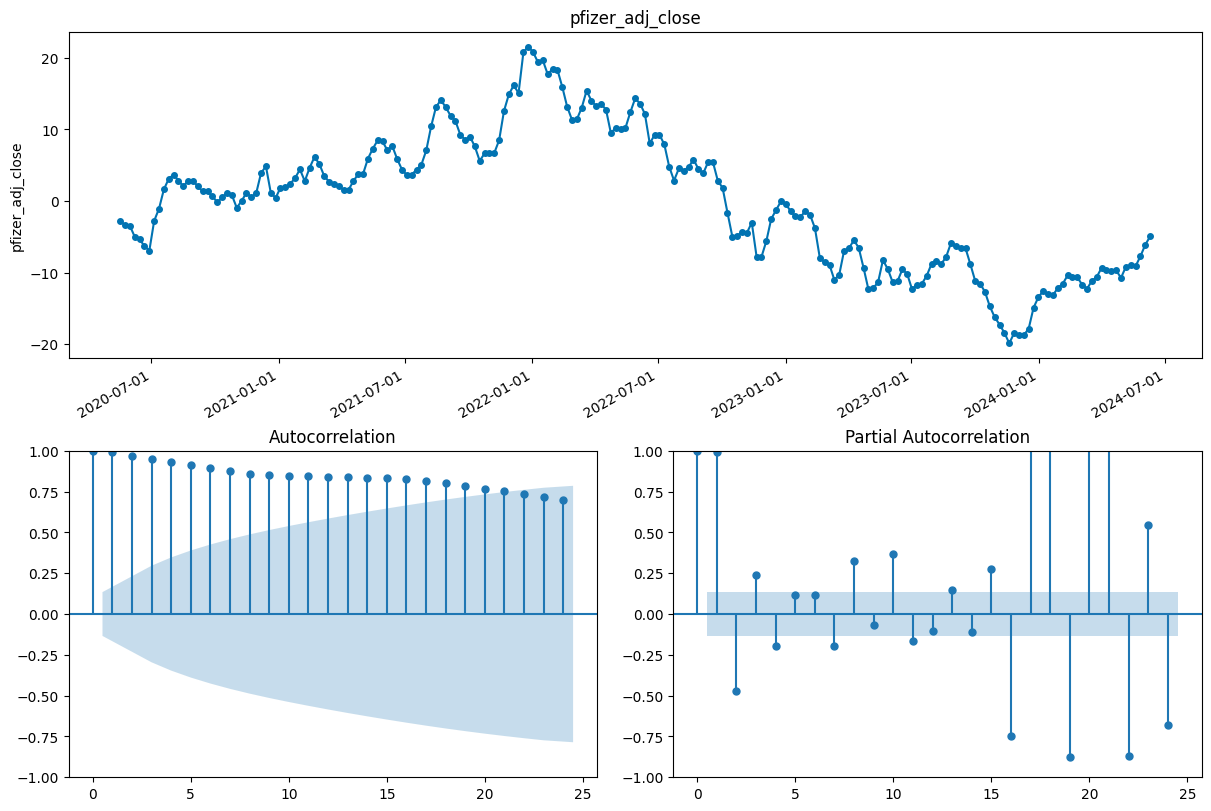

In [54]:
homemade_plot_correlations(combined_data['pfizer_adj_close'].diff(24 * STATIONAL_D).dropna())

Se observa que el primero valor de $P$ que entra en la campana de confianza de la autocorrelación es $P=22$, mientras que el primer valor de $Q$ que entra en la campana de confianza de la autocorrelación parcial es $Q=2$.

In [55]:
import warnings
warnings.filterwarnings('ignore')

P_ORDER = 2
D_ORDER = 1
Q_ORDER = 2

STATIONAL_P_ORDER = 23
STATIONAL_D_ORDER = 2
STATIONAL_Q_ORDER = 2
STATIONAL_REPETITION = 12

forecaster = ARIMA(
    order=(P_ORDER, D_ORDER, Q_ORDER),
    seasonal_order=(STATIONAL_P_ORDER, STATIONAL_D_ORDER, STATIONAL_Q_ORDER, STATIONAL_REPETITION)
)

try:
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh=np.arange(len(y_test)))
except:
    print('Invalid predictions. The model cannot forecast the test sample!')

Invalid predictions. The model cannot forecast the test sample!


#### Modelo Prophet

Prophet es un modelo de series temporales desarrollado por Facebook que se destaca por su capacidad para manejar automáticamente múltiples componentes de las series temporales, incluyendo tendencias, estacionalidad y efectos de días festivos.

Utiliza un enfoque aditivo para modelar estos componentes, permitiendo así que la serie temporal pueda presentar variaciones tanto estacionales como no estacionales.

Prophet es robusto frente a datos faltantes y puede manejar cambios abruptos en las tendencias. Es ampliamente utilizado por su facilidad de implementación y su capacidad para generar pronósticos precisos en diferentes contextos de series temporales.

Ya que no es restrictivo frente a componentes de estacionalidad y estacionariedad, se ha decidido utilizar para comparar su rendimiento frente a los modelos anteriores.

In [56]:
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame({
    'ds': combined_data['pfizer_adj_close'].index,
    'y': combined_data['pfizer_adj_close'].values}
)

# Dividir los datos en entrenamiento y prueba
df_train, df_test = temporal_train_test_split(df, train_size=0.8)

forecaster = Prophet()
forecaster.fit(df_train)

y_pred = forecaster.predict(df_test)

y_pred = y_pred[['ds', 'yhat']]
y_pred.set_index('ds', inplace=True)

17:24:13 - cmdstanpy - INFO - Chain [1] start processing
17:24:13 - cmdstanpy - INFO - Chain [1] done processing


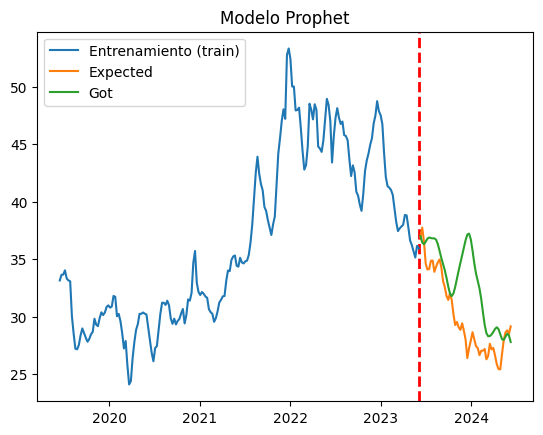

In [57]:
plot_prediction_results(y_train, y_test, y_pred, 'Modelo Prophet')

In [58]:
pd.DataFrame.from_records(
    [('Prophet', mean_absolute_percentage_error(y_test, y_pred))],
    columns=['Algoritmo', 'Error promedio porcentual absoluto']
)

,Algoritmo,Error promedio porcentual absoluto
0,Prophet,0.107679


### Series multivariadas

El análisis de series temporales multivariadas es ligeramente diferente respecto al análisis de series univariadas, pues los algoritmos utilizados anteriormente no soportan (sea completa o parcialmente) series multivariadas. Para ello, se deben utilizar modelos que se hayan diseñado para este tipo de series, como puedan ser:

* Modelo VAR
* Modelo VARMAX

In [100]:
y_train, y_test  = temporal_train_test_split(combined_data, train_size=0.8)

#### Modelo VAR

El modelo VAR (Vector Autoregressive) es una técnica de análisis de series temporales que captura la interdependencia entre múltiples variables a lo largo del tiempo. Cada variable en el modelo VAR es una función lineal de sus propios valores anteriores y de los valores anteriores de todas las demás variables incluidas en el modelo.

In [101]:
from sktime.forecasting.var import VAR

Una de las condiciones de los modelos VAR es que los datos deben ser estacionarios. Como se observó anteriormente, aplicando una única diferenciación todos los conjuntos de datos del proyecto se vuelven estacionarios.

In [102]:
# Diferenciar y_train
y_train_diff = y_train.diff().dropna()

# Entrenar modelo
forecaster = VAR()
forecaster.fit(y_train_diff)

# Realizar predicciones
y_pred = forecaster.predict(fh=np.arange(len(y_test)))
pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

Ya que se tendrá que diferenciar el conjunto de datos completo para poder entrenar el modelo, las predicciones obtenidas del mismo serán predicciones diferenciadas también. Para poder obtener los valores reales predichos, habrá que realizar una "desdiferenciación" de los datos.

In [103]:
# Desdiferenciar pred
last_values = y_train.iloc[-1]
forecast_original_scale = pred_df.cumsum() + last_values

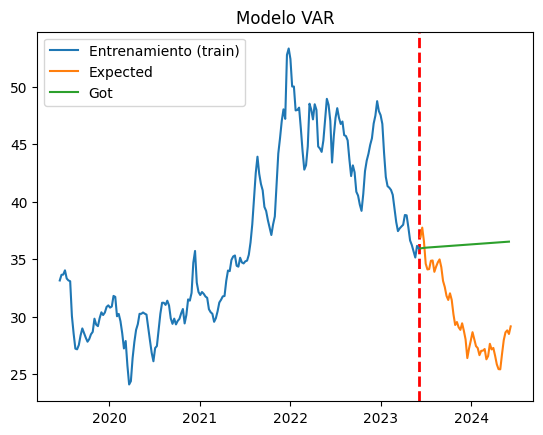

In [104]:
plot_prediction_results(
    y_train['pfizer_adj_close'],
    y_test['pfizer_adj_close'],
    forecast_original_scale['pfizer_adj_close'],
    'Modelo VAR'
)

In [ ]:
pd.DataFrame.from_records(
    [('VAR', mean_absolute_percentage_error(y_test, y_pred))],
    columns=['Algoritmo', 'Error promedio porcentual absoluto']
)

#### Modelo VARMA

El modelo VARMAX (_Vector Autoregressive Moving Average with eXogenous variables_) es una extensión del modelo VAR (_Vector Autoregressive_) que incluye componentes de medias móviles (MA).

Se recomienda su uso para series temporales multivariadas estacionales, similar al modelo VAR.

In [105]:
from sktime.forecasting.varmax import VARMAX

El modelo VARMAX requiere de elección de parámetros _p_ y _q_, relacionados con el componente regresivo y de medias moviles. Estos componentes se calculan de manera similar a los homónimos del ARIMA, por lo que se debe graficar la serie temporal diferenciada para observar los valores ideales de _p_ y _q_.

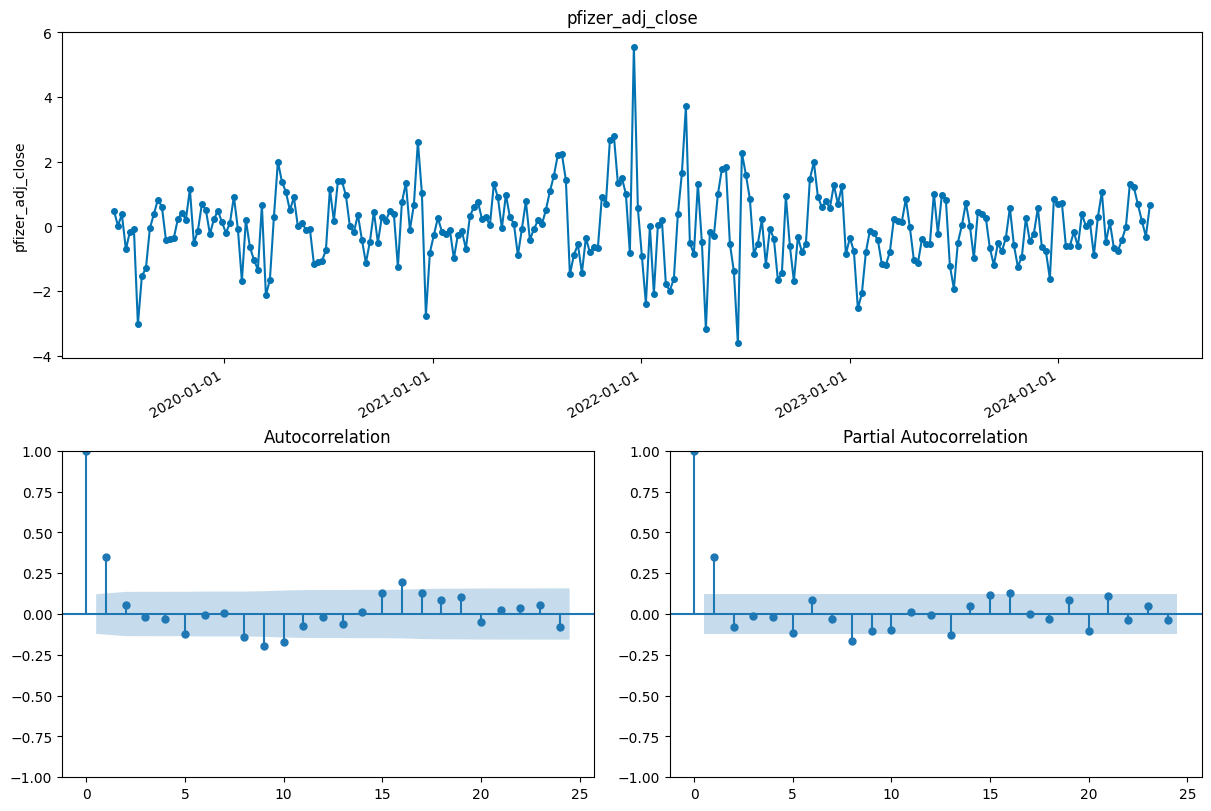

In [106]:
homemade_plot_correlations(combined_data['pfizer_adj_close'].diff().dropna())

Se observa que en los valores $p=2$ y $q=2$, las gráficas de autocorrelación y autocorrelación parcial se encuentran dentro de los intervalos de confianza, por lo que este debe ser el orden estimado para el modelo.

In [107]:
# Diferenciar y_train
y_train_diff = y_train.diff().dropna()

P_ORDER = 2
Q_ORDER = 2

# Entrenar modelo
forecaster = VARMAX(order=(P_ORDER, Q_ORDER))
forecaster.fit(y_train_diff)

# Realizar predicciones
y_pred = forecaster.predict(fh=np.arange(len(y_test)))
pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

VARMAX(order=(2, 2))

Similar al procedimiento del VAR, se tendrá que desdiferenciar el conjunto de datos predicho para obtener las predicciones en la escala real.

In [109]:
# Desdiferenciar pred
last_values = y_train.iloc[-1]
forecast_original_scale = pred_df.cumsum() + last_values

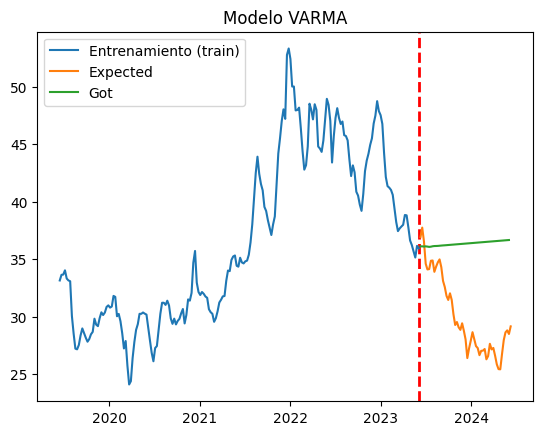

In [110]:
plot_prediction_results(
    y_train['pfizer_adj_close'],
    y_test['pfizer_adj_close'],
    forecast_original_scale['pfizer_adj_close'],
    'Modelo VARMA'
)

In [ ]:
pd.DataFrame.from_records(
    [('VARMA', mean_absolute_percentage_error(y_test, y_pred))],
    columns=['Algoritmo', 'Error promedio porcentual absoluto']
)

### Conclusiones

Las conclusiones extraídas del proyecto es que los modelos basados en técnicas autoregresivas no han resultado en buenas estimaciones, independientemente de si hablamos de modelos univariados (ARIMA) o de modelos multivariados (VAR y VARMA). Pese a poder establecer las series temporales como estacionarias, las características del conjunto de datos no han permitido que estos modelos realizaran estimaciones certeras.

En el caso del modelo de suavizado exponencial, ya se esperaba que no llegara a ser óptimo debido a la naturaleza del conjunto de datos, y tras ser probado se confirmó la sospecha.

El mejor modelo encontrado ha sido el modelo _Prophet_, pues alcanza un _MAPE_ de 0.10, el más bajo registrado.

## Uso de flujos de datos (_Data Streams_)

### Planteamiento del problema

Hasta ahora se han analizado series temporales completas con una longitud finita, conociendo en todo momento la longitud de los conjuntos de datos de entrenamiento y prueba.

Sin embargo, en muchas aplicaciones del mundo real, especialmente en entornos donde los datos se generan continuamente a lo largo del tiempo, como redes sociales, sensores IoT, mercados financieros, entre otros, las series temporales no tienen una longitud finita y estática. En cambio, se actualizan constantemente con nuevos datos a medida que están disponibles, formando lo que se conoce como flujos de datos o data streams.

En esta parte del proyecto se busca analizar el rendimiento de técnicas de _data streams_ para predecir el comportamiento del precio de acciones de _Pfizer_ en los últimos 5 años, igual que en el apartado de "series temporales".

Para ello se utilizarán los mismos conjuntos de datos junto con las mismas transformaciones y ajustes de granularidad temporal que en el apartado anterior.

### Implementación de modelos

Para el análisis de data streams se utilizará la librería de _python_ [`River`](https://riverml.xyz/0.11.1/), un módulo diseñado para trabajar con _data streaming_ mediante técnicas de _machine learning_.

Los modelos de _data streaming_ elegidos para realizar el análisis son los siguientes:

* Regresión lineal
* Regresor de árbol de _Hoeffding_

La métrica de rendimiento utilizada para este apartado vuelve a ser el MAPE _(Mean Average Percentage Error)_.

In [145]:
from river import metrics
from river import utils
import matplotlib.pyplot as plt

# ? https://riverml.xyz/latest/examples/building-a-simple-nowcasting-model/#building-a-simple-nowcasting-model
def evaluate_model(model, serie: pd.Series) -> None: 

    metric = utils.Rolling(metrics.MAPE(), 12)

    dates = []
    y_trues = []
    y_preds = []

    for x, (timestamp, y) in enumerate(serie.items()):
        x = {'date': x}
        # Obtain the prior prediction and update the model in one go
        y_pred = model.predict_one(x)
        model.learn_one(x, y)

        # Update the error metric
        metric.update(y, y_pred)

        # Store the true value and the prediction
        dates.append(timestamp)
        y_trues.append(y)
        y_preds.append(y_pred)

    # Plot the results
    _, ax = plt.subplots(figsize=(10, 6))
    ax.grid(alpha=0.75)
    ax.plot(dates, y_trues, lw=3, color='#2ecc71', alpha=0.8, label='Expected')
    ax.plot(dates, y_preds, lw=3, color='#e74c3c', alpha=0.8, label='Got')
    ax.legend()
    ax.set_title(metric)

    plt.show()

#### Regresión lineal

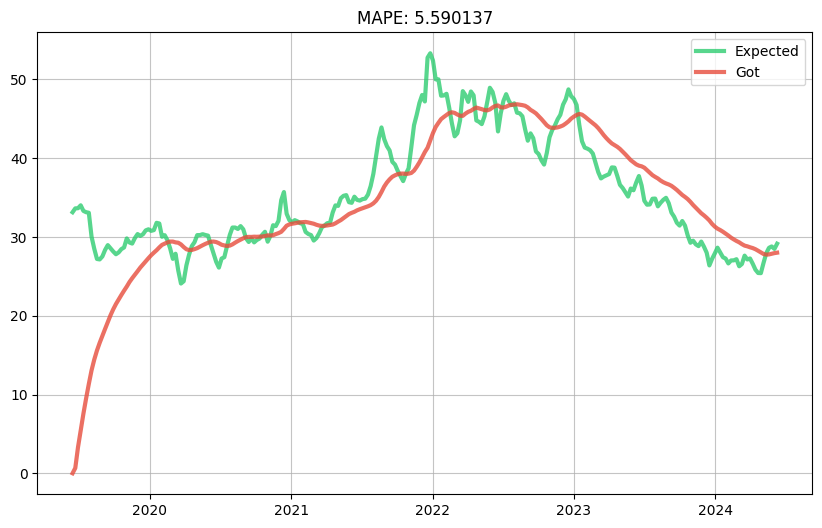

In [146]:
from river import compose
from river import preprocessing
from river import linear_model

model = compose.Pipeline(
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression())
)

evaluate_model(model, combined_data['pfizer_adj_close'])

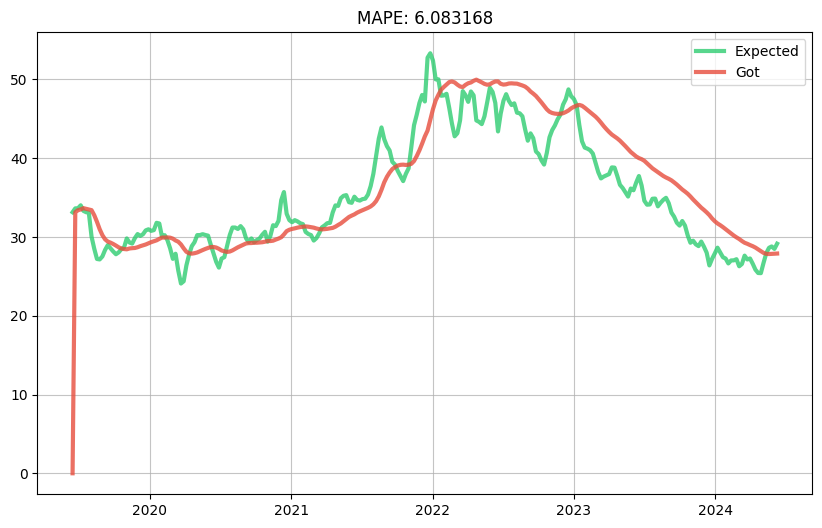

In [147]:
from river import stats


model = compose.Pipeline(
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(intercept_lr=0)),
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model, combined_data['pfizer_adj_close'])

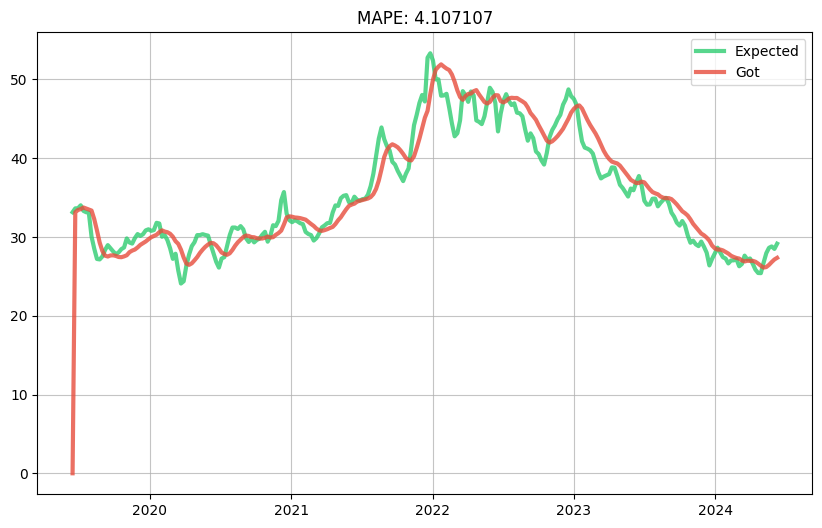

In [148]:
from river import optim

model = compose.Pipeline(
    ('scale', preprocessing.StandardScaler()),
    ('lin_reg', linear_model.LinearRegression(
        intercept_lr=0,
        optimizer=optim.SGD(0.03)
    ))
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model, combined_data['pfizer_adj_close'])

#### Regresión por árbol de Hoeffding


Los _Hoeffding Trees_, también conocidos como árboles de decisión de _Hoeffding_, son una técnica de aprendizaje incremental ideal para entornos de data streaming. A diferencia de los árboles de decisión tradicionales que se entrenan en lotes de datos, los _Hoeffding Trees_ se actualizan continuamente con cada nueva instancia de datos.

Utilizan la desigualdad de Hoeffding para decidir de manera eficiente y con alta probabilidad cuándo realizar particiones en los nodos del árbol, lo que permite que el modelo se adapte rápidamente a los cambios en el flujo de datos mientras mantiene un bajo consumo de memoria.

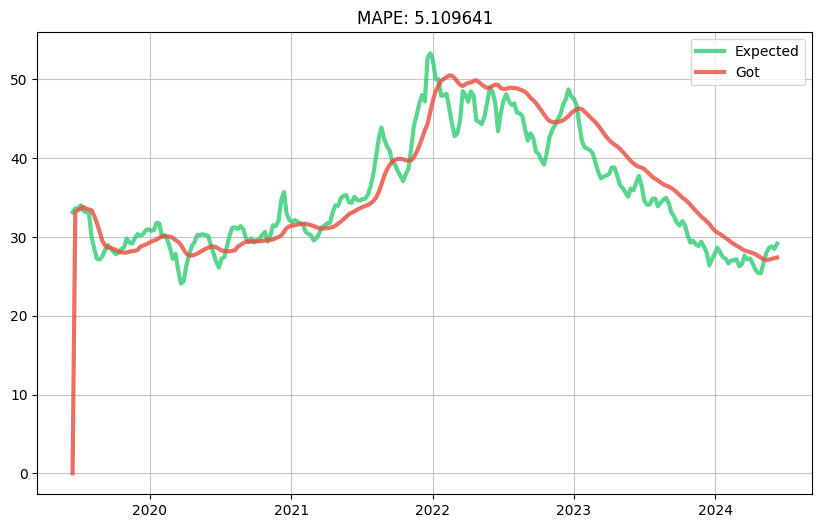

In [150]:
from river import tree

model = compose.Pipeline(
    ('scale', preprocessing.StandardScaler()),
    ('hoeffding_tree', tree.HoeffdingTreeRegressor())
)

model = preprocessing.TargetStandardScaler(regressor=model)

evaluate_model(model, combined_data['pfizer_adj_close'])

### Conclusiones

Tras aplicar técnicas de _data streaming_ a los datos, se observa que la tendencia y los valores reales de los datos se logran alcanzar con bastante exactitud, teniendo un **MAPE** de aproximadamente un 5% con la mayoría de regresores. Comparado con los métodos de series temporales, se observa una mejoría evidente.

Dentro de estos modelos, el que mejores resultados ha obtenido ha sido el de regresión lineal base, alcanzando un **MAPE** de 4.1%.